# Pivot Table 
1. ***The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.groupby(['sex','smoker'])['total_bill'].mean().unstack()

/var/folders/x6/3z1b_1m13nn8gl_5jykvtxy40000gn/T/ipykernel_5363/2279680371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])['total_bill'].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [4]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

/var/folders/x6/3z1b_1m13nn8gl_5jykvtxy40000gn/T/ipykernel_5363/3627826641.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [5]:
df.pivot_table(index='sex',columns='smoker',values=['total_bill','size','tip'])

/var/folders/x6/3z1b_1m13nn8gl_5jykvtxy40000gn/T/ipykernel_5363/1800315526.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill','size','tip'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
#multidimension
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill',aggfunc=(['mean','max','sum']),observed=False)


mean                                                  \
day                 Thur               Fri                Sat        Sun   
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner   
sex    smoker                                                              
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333   
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256   
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000   
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286   

                 max                                        sum                \
day             Thur           Fri           Sat    Sun    Thur           Fri   
time           Lunch Dinner  Lunch Dinner Dinner Dinner   Lunch Dinner  Lunch   
sex    smoker                                                                   
Male   Yes     32.68    NaN  13.42  40.17  50.81  45.35  191.71   0.00  34.16   
       No      41.19    NaN    NaN  22.49  48.33  48.17  369.73   0.00   0.00   
Female Yes     43.11    NaN  16.27  16.32  44.30  20.90  134.53   0.00  39.78   
       No      34.83  18.78  15.98  22.75  35.83  35.26  381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [8]:
#margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',observed=False,margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [9]:
#plotting graph
df1=pd.read_csv('expense_data.csv')

In [10]:
df1['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [12]:
df1['Date']=pd.to_datetime(df1['Date'])

In [13]:
df1

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [14]:
df1['month']=df1['Date'].dt.month_name()

In [15]:
df1

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November


<Axes: xlabel='month'>

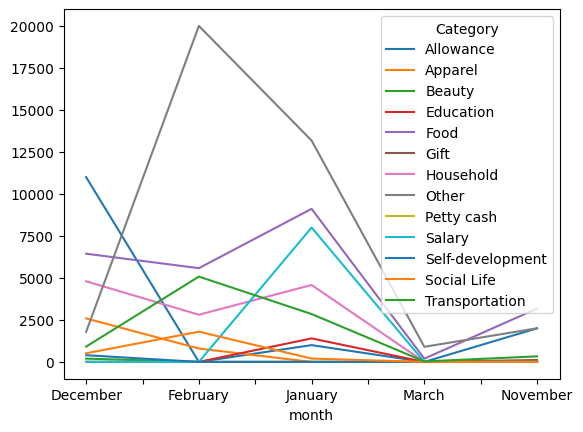

In [16]:
df1.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0,observed=False).plot()

<Axes: xlabel='month'>

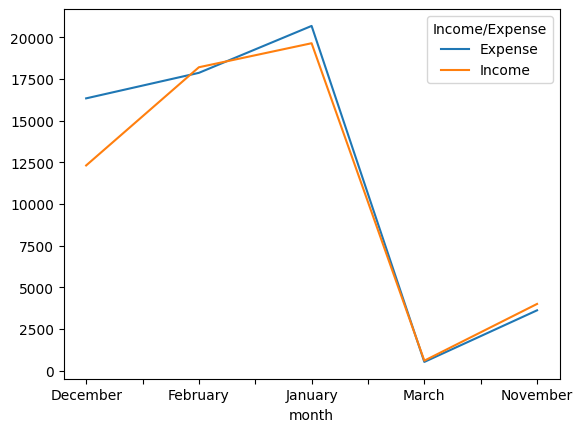

In [17]:
df1.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0,observed=False).plot()